In [45]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [46]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [47]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [48]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [49]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [50]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [51]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [52]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [53]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [54]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [55]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [56]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [57]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:07, 15.30it/s]                         


Epoch 1 of 100
Generator loss: 0.03347961, Discriminator loss: 0.01660341


118it [00:07, 15.02it/s]                         


Epoch 2 of 100
Generator loss: 0.01691100, Discriminator loss: 0.02479729


118it [00:07, 15.04it/s]                         


Epoch 3 of 100
Generator loss: 0.10905761, Discriminator loss: 0.00045235


118it [00:08, 14.74it/s]                         


Epoch 4 of 100
Generator loss: 0.04162748, Discriminator loss: 0.01279870


118it [00:07, 15.02it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


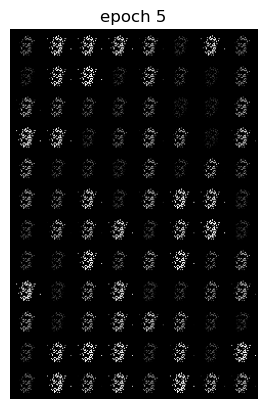

Epoch 5 of 100
Generator loss: 0.06157495, Discriminator loss: 0.00907145


118it [00:07, 15.03it/s]                         


Epoch 6 of 100
Generator loss: 0.00942546, Discriminator loss: 0.02998121


118it [00:07, 15.26it/s]                         


Epoch 7 of 100
Generator loss: 0.00939722, Discriminator loss: 0.02966901


118it [00:07, 14.91it/s]                         


Epoch 8 of 100
Generator loss: 0.02595542, Discriminator loss: 0.01652955


118it [00:08, 14.72it/s]                         


Epoch 9 of 100
Generator loss: 0.03949830, Discriminator loss: 0.00885304


118it [00:07, 14.87it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


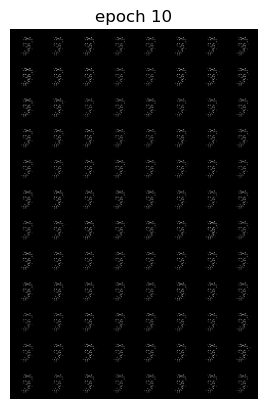

Epoch 10 of 100
Generator loss: 0.07634451, Discriminator loss: 0.01017787


118it [00:07, 15.06it/s]                         


Epoch 11 of 100
Generator loss: 0.02978419, Discriminator loss: 0.01660167


118it [00:08, 14.64it/s]                         


Epoch 12 of 100
Generator loss: 0.00796738, Discriminator loss: 0.02947446


118it [00:07, 15.00it/s]                         


Epoch 13 of 100
Generator loss: 0.01607118, Discriminator loss: 0.01976697


118it [00:07, 15.05it/s]                         


Epoch 14 of 100
Generator loss: 0.03058165, Discriminator loss: 0.00855605


118it [00:08, 14.60it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


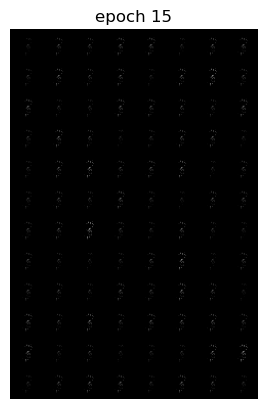

Epoch 15 of 100
Generator loss: 0.04573390, Discriminator loss: 0.01118039


118it [00:07, 14.94it/s]                         


Epoch 16 of 100
Generator loss: 0.03184053, Discriminator loss: 0.00691550


118it [00:07, 15.14it/s]                         


Epoch 17 of 100
Generator loss: 0.06093137, Discriminator loss: 0.00503273


118it [00:07, 15.30it/s]                         


Epoch 18 of 100
Generator loss: 0.03946622, Discriminator loss: 0.01038839


118it [00:07, 15.20it/s]                         


Epoch 19 of 100
Generator loss: 0.05516745, Discriminator loss: 0.00630558


118it [00:07, 15.01it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


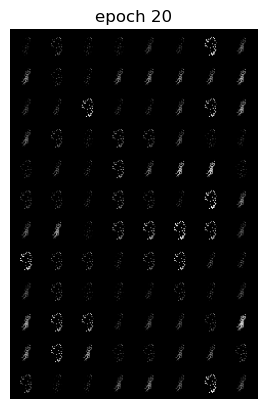

Epoch 20 of 100
Generator loss: 0.09918770, Discriminator loss: 0.00295132


118it [00:07, 14.98it/s]                         


Epoch 21 of 100
Generator loss: 0.06813008, Discriminator loss: 0.00698868


118it [00:07, 15.36it/s]                         


Epoch 22 of 100
Generator loss: 0.05989850, Discriminator loss: 0.01258597


118it [00:07, 15.21it/s]                         


Epoch 23 of 100
Generator loss: 0.05618313, Discriminator loss: 0.00743523


118it [00:07, 15.15it/s]                         


Epoch 24 of 100
Generator loss: 0.05457258, Discriminator loss: 0.00428228


118it [00:07, 15.14it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


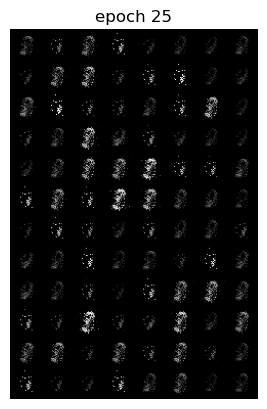

Epoch 25 of 100
Generator loss: 0.04402583, Discriminator loss: 0.00598527


118it [00:07, 15.19it/s]                         


Epoch 26 of 100
Generator loss: 0.05518898, Discriminator loss: 0.00758994


118it [00:07, 15.34it/s]                         


Epoch 27 of 100
Generator loss: 0.03925007, Discriminator loss: 0.01245682


118it [00:07, 15.29it/s]                         


Epoch 28 of 100
Generator loss: 0.04978232, Discriminator loss: 0.01022413


118it [00:07, 15.31it/s]                         


Epoch 29 of 100
Generator loss: 0.04038325, Discriminator loss: 0.00719764


118it [00:07, 15.49it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


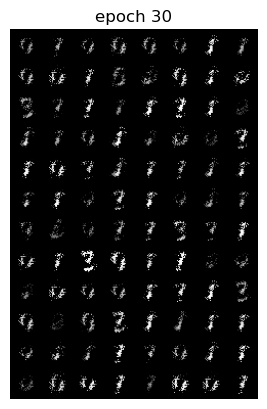

Epoch 30 of 100
Generator loss: 0.04389806, Discriminator loss: 0.00873671


118it [00:07, 15.18it/s]                         


Epoch 31 of 100
Generator loss: 0.03789371, Discriminator loss: 0.01271414


118it [00:07, 15.25it/s]                         


Epoch 32 of 100
Generator loss: 0.05819721, Discriminator loss: 0.00361798


118it [00:07, 15.33it/s]                         


Epoch 33 of 100
Generator loss: 0.04324168, Discriminator loss: 0.01196695


118it [00:07, 15.34it/s]                         


Epoch 34 of 100
Generator loss: 0.05808477, Discriminator loss: 0.00376573


118it [00:07, 15.18it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


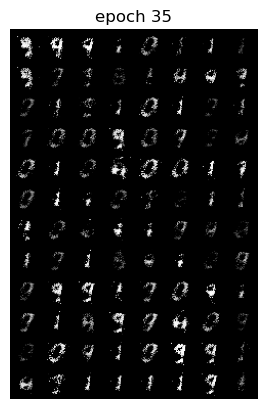

Epoch 35 of 100
Generator loss: 0.02886485, Discriminator loss: 0.00946640


118it [00:07, 15.17it/s]                         


Epoch 36 of 100
Generator loss: 0.03479635, Discriminator loss: 0.00963146


118it [00:07, 15.17it/s]                         


Epoch 37 of 100
Generator loss: 0.04120446, Discriminator loss: 0.01182727


118it [00:07, 15.20it/s]                         


Epoch 38 of 100
Generator loss: 0.04473991, Discriminator loss: 0.00624697


118it [00:07, 15.27it/s]                         


Epoch 39 of 100
Generator loss: 0.04097755, Discriminator loss: 0.00791974


118it [00:07, 14.92it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


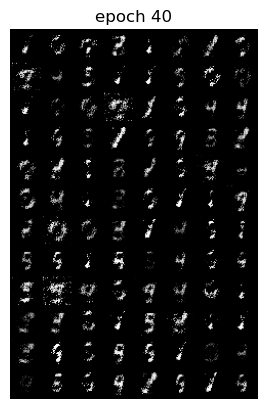

Epoch 40 of 100
Generator loss: 0.03760098, Discriminator loss: 0.01126279


118it [00:07, 15.25it/s]                         


Epoch 41 of 100
Generator loss: 0.03483183, Discriminator loss: 0.01214388


118it [00:07, 15.62it/s]                         


Epoch 42 of 100
Generator loss: 0.05928612, Discriminator loss: 0.00627083


118it [00:07, 15.12it/s]                         


Epoch 43 of 100
Generator loss: 0.03778467, Discriminator loss: 0.00804436


118it [00:07, 15.77it/s]                         


Epoch 44 of 100
Generator loss: 0.05046328, Discriminator loss: 0.00882534


118it [00:07, 15.48it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


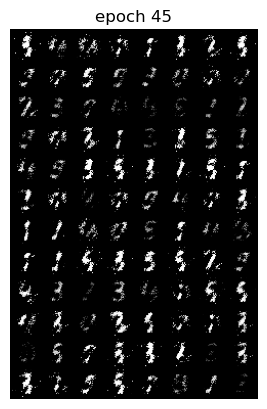

Epoch 45 of 100
Generator loss: 0.05566817, Discriminator loss: 0.00665244


118it [00:07, 15.64it/s]                         


Epoch 46 of 100
Generator loss: 0.05458004, Discriminator loss: 0.00967228


118it [00:07, 14.88it/s]                         


Epoch 47 of 100
Generator loss: 0.05368805, Discriminator loss: 0.00803108


118it [00:07, 15.26it/s]                         


Epoch 48 of 100
Generator loss: 0.05235014, Discriminator loss: 0.00810734


118it [00:07, 15.76it/s]                         


Epoch 49 of 100
Generator loss: 0.04294423, Discriminator loss: 0.00806189


118it [00:07, 15.19it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


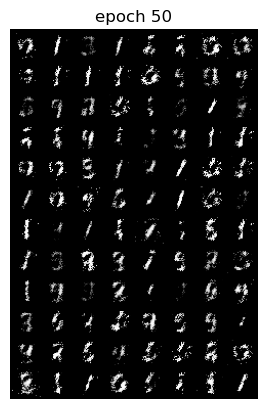

Epoch 50 of 100
Generator loss: 0.04637862, Discriminator loss: 0.01051001


118it [00:07, 15.52it/s]                         


Epoch 51 of 100
Generator loss: 0.03667617, Discriminator loss: 0.01071267


118it [00:07, 15.70it/s]                         


Epoch 52 of 100
Generator loss: 0.04436785, Discriminator loss: 0.00716773


118it [00:07, 15.45it/s]                         


Epoch 53 of 100
Generator loss: 0.04858918, Discriminator loss: 0.00791781


118it [00:07, 15.46it/s]                         


Epoch 54 of 100
Generator loss: 0.04319712, Discriminator loss: 0.01125628


118it [00:07, 15.62it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


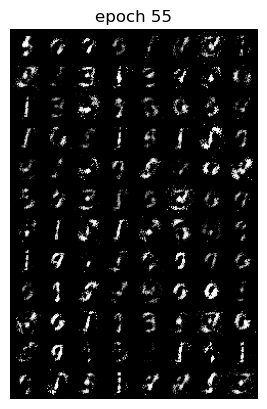

Epoch 55 of 100
Generator loss: 0.04502179, Discriminator loss: 0.01109595


118it [00:07, 16.79it/s]                         


Epoch 56 of 100
Generator loss: 0.04775421, Discriminator loss: 0.00943031


118it [00:07, 16.78it/s]                         


Epoch 57 of 100
Generator loss: 0.05201795, Discriminator loss: 0.00420604


118it [00:07, 16.76it/s]                         


Epoch 58 of 100
Generator loss: 0.05723512, Discriminator loss: 0.00679745


118it [00:07, 16.54it/s]                         


Epoch 59 of 100
Generator loss: 0.04519342, Discriminator loss: 0.00929591


118it [00:07, 16.66it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


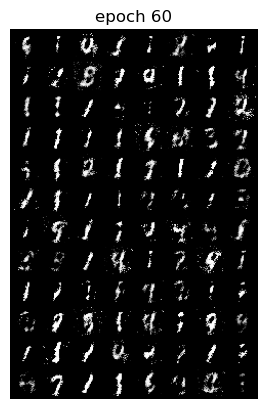

Epoch 60 of 100
Generator loss: 0.03802256, Discriminator loss: 0.01616099


118it [00:07, 16.65it/s]                         


Epoch 61 of 100
Generator loss: 0.04470368, Discriminator loss: 0.01091953


118it [00:07, 16.59it/s]                         


Epoch 62 of 100
Generator loss: 0.05694603, Discriminator loss: 0.01022138


118it [00:07, 16.60it/s]                         


Epoch 63 of 100
Generator loss: 0.04018895, Discriminator loss: 0.01356577


118it [00:07, 15.87it/s]                         


Epoch 64 of 100
Generator loss: 0.04661795, Discriminator loss: 0.00862998


118it [00:10, 11.40it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


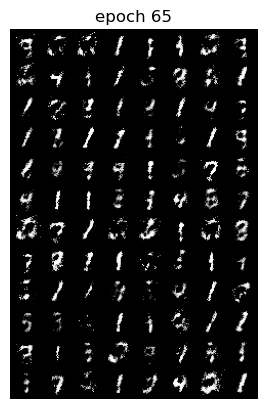

Epoch 65 of 100
Generator loss: 0.03655424, Discriminator loss: 0.00927443


118it [00:06, 17.52it/s]                         


Epoch 66 of 100
Generator loss: 0.04635521, Discriminator loss: 0.00770866


118it [00:06, 17.58it/s]                         


Epoch 67 of 100
Generator loss: 0.03915066, Discriminator loss: 0.01005522


118it [00:06, 17.52it/s]                         


Epoch 68 of 100
Generator loss: 0.04315355, Discriminator loss: 0.00988957


118it [00:06, 17.34it/s]                         


Epoch 69 of 100
Generator loss: 0.04539390, Discriminator loss: 0.00936689


118it [00:06, 17.45it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


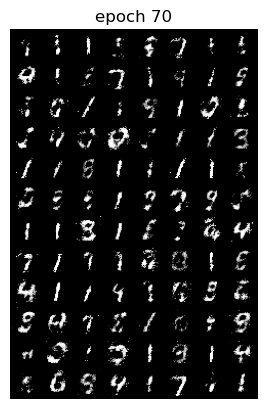

Epoch 70 of 100
Generator loss: 0.03711496, Discriminator loss: 0.01178575


118it [00:06, 17.33it/s]                         


Epoch 71 of 100
Generator loss: 0.05058590, Discriminator loss: 0.01152158


118it [00:06, 17.52it/s]                         


Epoch 72 of 100
Generator loss: 0.04459816, Discriminator loss: 0.01064241


118it [00:06, 17.12it/s]                         


Epoch 73 of 100
Generator loss: 0.03364245, Discriminator loss: 0.01245949


118it [00:06, 17.50it/s]                         


Epoch 74 of 100
Generator loss: 0.04621869, Discriminator loss: 0.00911769


118it [00:06, 17.49it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


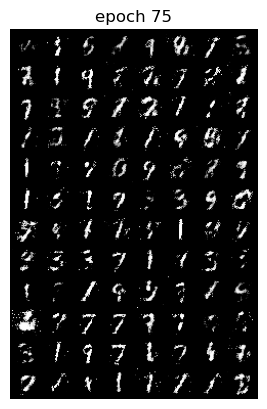

Epoch 75 of 100
Generator loss: 0.03235988, Discriminator loss: 0.01322556


118it [00:06, 17.13it/s]                         


Epoch 76 of 100
Generator loss: 0.04048450, Discriminator loss: 0.01088314


118it [00:06, 17.63it/s]                         


Epoch 77 of 100
Generator loss: 0.03432290, Discriminator loss: 0.00924303


118it [00:06, 17.69it/s]                         


Epoch 78 of 100
Generator loss: 0.04304794, Discriminator loss: 0.01204935


118it [00:06, 17.69it/s]                         


Epoch 79 of 100
Generator loss: 0.03622883, Discriminator loss: 0.01128241


118it [00:06, 17.78it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


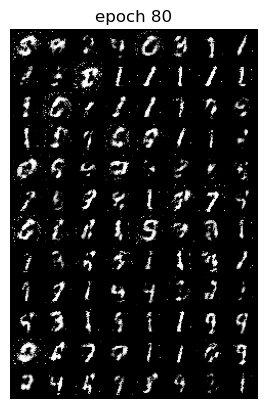

Epoch 80 of 100
Generator loss: 0.02765238, Discriminator loss: 0.01177674


118it [00:06, 17.70it/s]                         


Epoch 81 of 100
Generator loss: 0.04272049, Discriminator loss: 0.01171254


118it [00:06, 17.69it/s]                         


Epoch 82 of 100
Generator loss: 0.04817905, Discriminator loss: 0.01056037


118it [00:06, 17.64it/s]                         


Epoch 83 of 100
Generator loss: 0.04254711, Discriminator loss: 0.01110519


118it [00:06, 17.70it/s]                         


Epoch 84 of 100
Generator loss: 0.03770585, Discriminator loss: 0.01295003


118it [00:06, 17.51it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


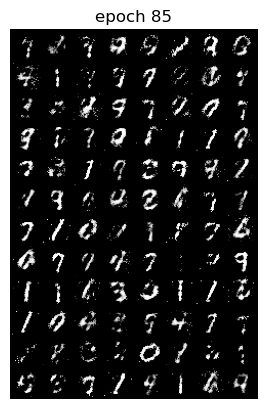

Epoch 85 of 100
Generator loss: 0.05119110, Discriminator loss: 0.00936037


118it [00:06, 17.60it/s]                         


Epoch 86 of 100
Generator loss: 0.04515077, Discriminator loss: 0.00875992


118it [00:06, 17.48it/s]                         


Epoch 87 of 100
Generator loss: 0.05328781, Discriminator loss: 0.01103072


118it [00:06, 17.71it/s]                         


Epoch 88 of 100
Generator loss: 0.03616399, Discriminator loss: 0.01192834


118it [00:06, 17.63it/s]                         


Epoch 89 of 100
Generator loss: 0.03262658, Discriminator loss: 0.01249717


118it [00:06, 17.83it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


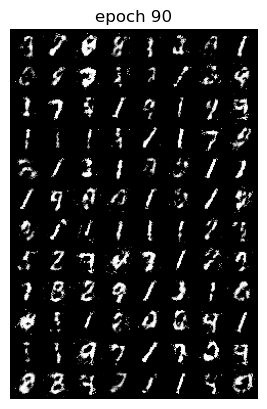

Epoch 90 of 100
Generator loss: 0.03458821, Discriminator loss: 0.01301689


118it [00:06, 17.70it/s]                         


Epoch 91 of 100
Generator loss: 0.04509817, Discriminator loss: 0.00959284


118it [00:06, 17.90it/s]                         


Epoch 92 of 100
Generator loss: 0.03986225, Discriminator loss: 0.01216140


118it [00:06, 17.62it/s]                         


Epoch 93 of 100
Generator loss: 0.02939516, Discriminator loss: 0.01441353


118it [00:06, 17.88it/s]                         


Epoch 94 of 100
Generator loss: 0.02967762, Discriminator loss: 0.01814240


118it [00:06, 17.81it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


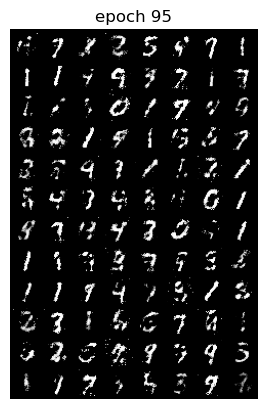

Epoch 95 of 100
Generator loss: 0.02858221, Discriminator loss: 0.01292199


118it [00:06, 17.73it/s]                         


Epoch 96 of 100
Generator loss: 0.03143096, Discriminator loss: 0.01085352


118it [00:06, 17.85it/s]                         


Epoch 97 of 100
Generator loss: 0.02460503, Discriminator loss: 0.01034047


118it [00:06, 17.98it/s]                         


Epoch 98 of 100
Generator loss: 0.03165548, Discriminator loss: 0.01157745


118it [00:06, 17.82it/s]                         


Epoch 99 of 100
Generator loss: 0.02873497, Discriminator loss: 0.01876067


118it [00:06, 17.96it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


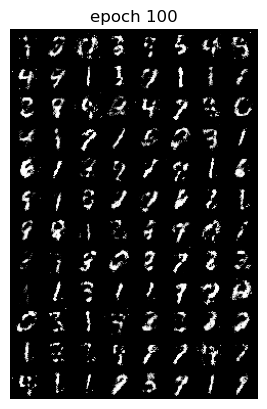

Epoch 100 of 100
Generator loss: 0.03191744, Discriminator loss: 0.01682679


In [58]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    
    return criterion(output, true_label)

    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    
    real_loss = criterion(real_output, label_real(real_output.size(0)))
    fake_loss = criterion(fake_output, label_fake(fake_output.size(0)))
    return real_loss + fake_loss
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        real_data, _ = data
        real_data = real_data.to(device)
        batch_size = real_data.size(0)

        # Train Discriminator
        noise = create_noise(batch_size, nz)
        fake_data = generator(noise)
        real_output = discriminator(real_data)
        fake_output = discriminator(fake_data.detach())
        loss_d = discriminator_loss(real_output, fake_output)
        optim_d.zero_grad()
        loss_d.backward()
        optim_d.step()

        # Train Generator
        output = discriminator(fake_data)
        loss_g = generator_loss(output, label_real(batch_size))
        optim_g.zero_grad()
        loss_g.backward()
        optim_g.step()

        loss_g += loss_g.item()
        loss_d += loss_d.item()
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [59]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [60]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

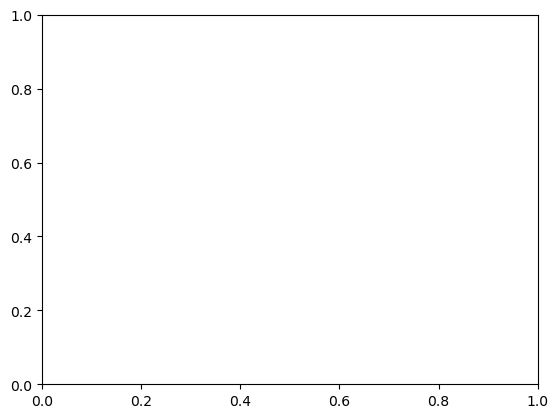

In [62]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')